### Name: 陳昱丞
### Student ID: 0716206

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 27 04:59:57 2020

@author: user
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

Linear Regression:

Data Generation:
依題目要求產生1000筆資料並畫成散佈圖。

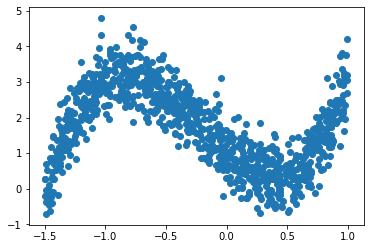

In [2]:
s = np.random.normal(0, 0.5, 1000)

data_x=[]
data_y=[]
for i in range(1000):
    x = random.uniform(-1.5, 1.0)
    y = 3*(x*x*x)+2*(x*x)-3*x+1+s[i]
    data_x.append(x)
    data_y.append(y)
plt.scatter(data_x, data_y)
plt.show()

Data Preprocessing:
K=1,2,3,4，分別傳進函式PolynomialFeature，得到四組所求。

In [3]:
x=np.array(data_x).reshape(-1, 1)
poly1 = PolynomialFeatures(degree=1)
X1 = poly1.fit_transform(x)
poly2 = PolynomialFeatures(degree=2)
X2 = poly2.fit_transform(x)
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(x)
poly4 = PolynomialFeatures(degree=4)
X4 = poly4.fit_transform(x)
print("K=1")
print(X1)
print("K=2")
print(X2)
print("K=3")
print(X3)
print("K=4")
print(X4)

K=1
[[ 1.         -1.14417595]
 [ 1.          0.75213993]
 [ 1.         -0.61813242]
 ...
 [ 1.         -1.42809396]
 [ 1.         -0.43242524]
 [ 1.         -0.68123568]]
K=2
[[ 1.         -1.14417595  1.30913861]
 [ 1.          0.75213993  0.56571447]
 [ 1.         -0.61813242  0.38208769]
 ...
 [ 1.         -1.42809396  2.03945235]
 [ 1.         -0.43242524  0.18699159]
 [ 1.         -0.68123568  0.46408205]]
K=3
[[ 1.         -1.14417595  1.30913861 -1.49788492]
 [ 1.          0.75213993  0.56571447  0.42549644]
 [ 1.         -0.61813242  0.38208769 -0.23618079]
 ...
 [ 1.         -1.42809396  2.03945235 -2.91252957]
 [ 1.         -0.43242524  0.18699159 -0.08085988]
 [ 1.         -0.68123568  0.46408205 -0.31614925]]
K=4
[[ 1.         -1.14417595  1.30913861 -1.49788492  1.7138439 ]
 [ 1.          0.75213993  0.56571447  0.42549644  0.32003286]
 [ 1.         -0.61813242  0.38208769 -0.23618079  0.145991  ]
 ...
 [ 1.         -1.42809396  2.03945235 -2.91252957  4.15936588]
 [ 1.  

Model Construction, Results:
用numpy中的ployfit和poly1d來分別產生weights和models，for迴圈跑1,2,3,4，產生一次、二次、三次、四次式，最後把他們和原本的散佈點一起印出來。用ployfit回傳的coefficients做成equations，並寫成Latex表示式。最後在label把表示式用r$ $包起來，就能呈現在圖中。

[-0.61, 1.55]
[-0.21, -0.71, 1.65]
[2.99, 2.02, -2.97, 1.01]
[0.03, 3.02, 1.99, -2.99, 1.02]


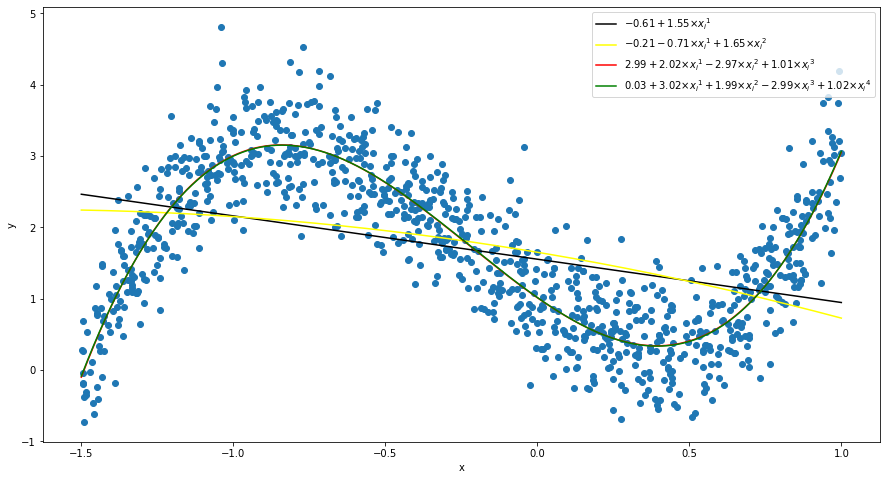

In [8]:
colors = ['black','yellow','red','green']
plt.figure(figsize=(15,8))
plt.scatter(data_x, data_y)
for i in range(1,5):
    co = np.polyfit(data_x, data_y, i)
    co_li = [round(c,2) for c in co]
    print(co_li)
    eq = str(co_li[0])
    for j in range(1,i+1):
        if co_li[j] > 0:
            eq+=('+'+str(co_li[j])+'×'+'{x_{i}}^{'+str(j)+'}')
        else:
            eq+=(str(co_li[j])+'×'+'{x_{i}}^{'+str(j)+'}')
    mymodel = np.poly1d(np.polyfit(data_x, data_y, i))
    myline = np.linspace(-1.5, 1.0, 1000)
    plt.plot(myline, mymodel(myline),color=colors[i-1],label=r"$"+eq+"$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

Logistic Regression:

Data Generation:
依題目要求產生隨機點並放進multivariate_normal模組，並將散佈點繪製成圖。

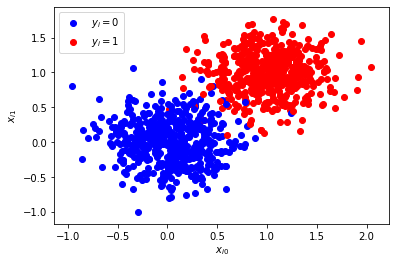

In [9]:
fig, ax = plt.subplots()
xI=[]
yI=[]
for i in range(1000):
    yi=random.choice([0,1])
    x, y = np.random.multivariate_normal([yi,yi], [[0.1,0],[0,0.1]], 1).T
    xI.append([x[0],y[0]])
    yI.append(yi)
    if yi==1:
        s1=ax.scatter(x, y, color='red')
    else:
        s2=ax.scatter(x, y, color='blue')
plt.xlabel(r"$x_{i0}$")
plt.ylabel(r"$x_{i1}$")
plt.legend((s2,s1),(r"$y_{i}=0$",r"$y_{i}=1$"), loc=2, scatterpoints=1)
plt.show()

Model Construction, Results:
用LogisticRegression產生model，並呼叫intercept和coef得到corresponded terms。此model的terms是
yi = L(-5.28 + 5.05×Xi0 + 5.17×Xi1)
正確率是0.988。

In [11]:
clf=LogisticRegression(solver='lbfgs')
clf.fit(xI,yI)
print(clf.intercept_,clf.coef_)
score = clf.score(xI, yI)
print("accuracy: "+str(score))

[-5.27620172] [[5.04746123 5.17182647]]
accuracy: 0.988


用以上結果繪出decision boundary。

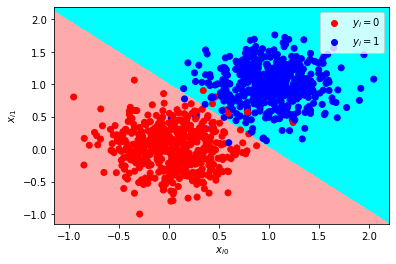

In [12]:
xx, yy = np.meshgrid(np.arange(-1.15, 2.2, 0.003),
                     np.arange(-1.15, 2.2, 0.003))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#00FFFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
x1=[a[0] for a in xI]
x2=[a[1] for a in xI]
plt.scatter(x1, x2, c=yI, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(r"$x_{i0}$")
plt.ylabel(r"$x_{i1}$")
plt.legend( (s1,s2),(r"$y_{i}=0$",r"$y_{i}=1$"), loc=1, scatterpoints=1)
plt.show()
